In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)



Text(0, 0.5, 'y')

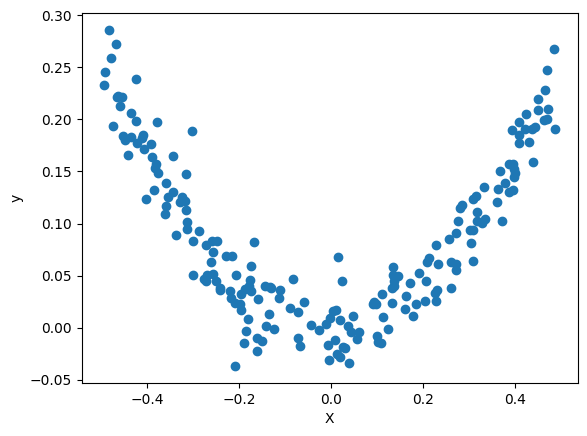

In [8]:
plt.scatter(X_quad, y_quad)
plt.xlabel('X')
plt.ylabel('y')

In [9]:
# Split the dataset into training and testing sets with 30% of data saved for testing
X_train, X_test, y_train, y_test = train_test_split(X_quad, y_quad, test_size=0.3, random_state=24)

Text(0, 0.5, 'y')

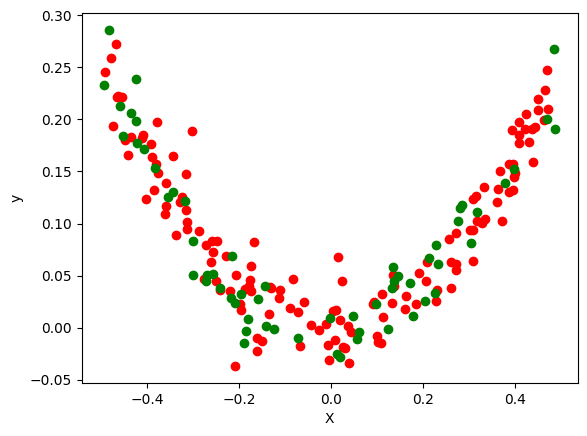

In [10]:
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='green')
plt.xlabel('X')
plt.ylabel('y')


In [11]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

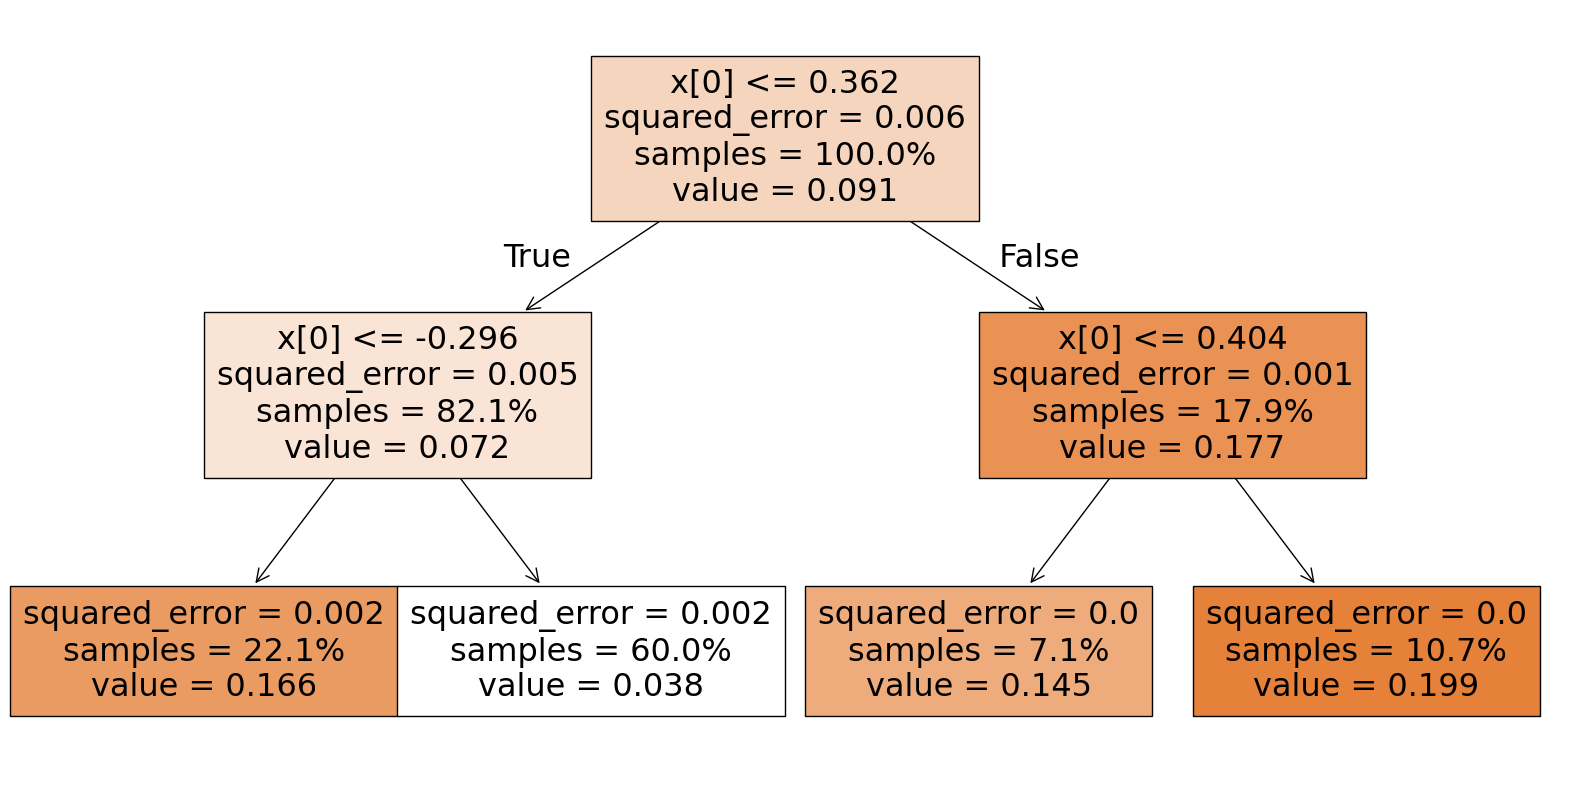

In [13]:
# Get the feature names from the iris dataset
plt.figure(figsize=(20,10))
tree.plot_tree(tree_reg, proportion=True, filled=True)
# plt.show()
plt.savefig('quad.png')

Let us look at the data that is flowing through the right branch of this tree

Mean of values satisfying X > 0.362 and X <= 0.404: 0.14468279144018542
Mean of values satisfying X > 0.362 and X > 0.404: 0.19930916199700063


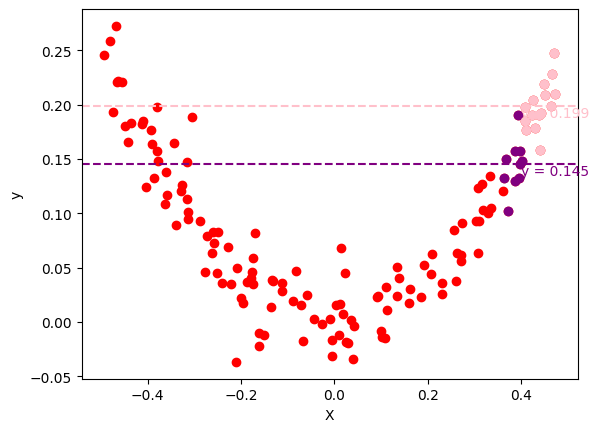

In [26]:
# Find x values greater than 0.362 and less than or equal to 0.404
filtered_X = X_train[(X_train > 0.362) & (X_train <= 0.404)]
filtered_y = y_train[(X_train > 0.362) & (X_train <= 0.404)]
filtered_X1 = X_train[(X_train > 0.362) & (X_train > 0.404)] # We don't need two conditions, just listing them to illustrate
filtered_y1 = y_train[(X_train > 0.362) & (X_train > 0.404)]

# Display the filtered x values
plt.scatter(X_train, y_train, color='red')
plt.scatter(filtered_X, filtered_y, color='purple')
plt.scatter(filtered_X1, filtered_y1, color='pink')

plt.axhline(y=0.145, color='purple', linestyle='--') # Add horizontal line
plt.text(0.4, 0.145, 'y = 0.145', color='purple', va='top') # Add text annotation

plt.axhline(y=0.199, color='pink', linestyle='--') # Add horizontal line
plt.text(0.4, 0.199, 'y = 0.199', color='pink', va='top') # Add text annotation
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let's understand how the tree determines the predicted y value

In [27]:
print(f"Mean of values satisfying X > 0.362 and X <= 0.404: {np.mean(filtered_y)}")
print(f"Mean of values satisfying X > 0.362 and X > 0.404: {np.mean(filtered_y1)}")



Mean of values satisfying X > 0.362 and X <= 0.404: 0.14468279144018542
Mean of values satisfying X > 0.362 and X > 0.404: 0.19930916199700063


Let's look at "max depth" hyper parameter

In [31]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

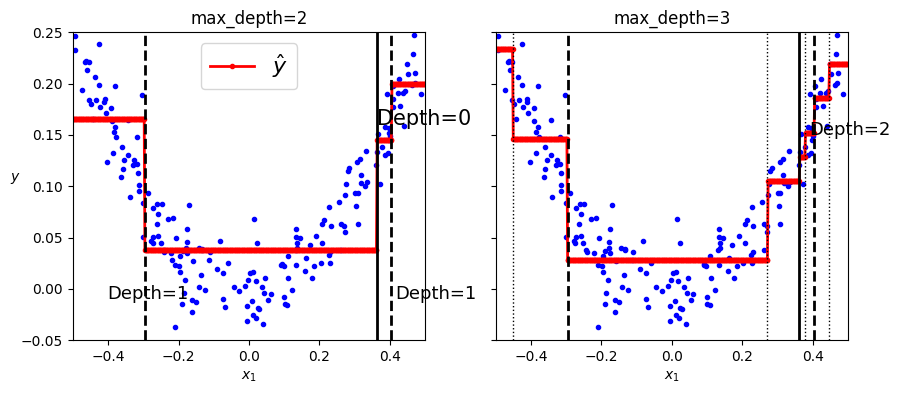

In [32]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

How far can we push the max_depth before we get overfitting? Let's use our test data to find out

In [46]:
test_scores = []
train_scores = []
print(f"Max depth \t | \t train score \t | \t test score")
print(f"--------------------------------------------------")
for i in range(2, 12):
  tree_reg = DecisionTreeRegressor(max_depth=i, random_state=42)
  tree_reg.fit(X_train, y_train)
  train_score = tree_reg.score(X_train, y_train)
  test_score = tree_reg.score(X_test, y_test)
  print(f"{i} \t | \t {train_score} \t | \t {test_score}")
  test_scores.append(test_score)
  train_scores.append(train_score)

Max depth 	 | 	 train score 	 | 	 test score
--------------------------------------------------
2 	 | 	 0.739526408607073 	 | 	 0.700630366167786
3 	 | 	 0.8637278052323027 	 | 	 0.8240747730743538
4 	 | 	 0.9022974201159171 	 | 	 0.8654506507052857
5 	 | 	 0.9302582302250124 	 | 	 0.8370672189810371
6 	 | 	 0.9485034179923492 	 | 	 0.8356573296682859
7 	 | 	 0.9583476980273042 	 | 	 0.8101366196056405
8 	 | 	 0.9744140971890585 	 | 	 0.8007715777747677
9 	 | 	 0.9812581610095401 	 | 	 0.7982812046550422
10 	 | 	 0.9848664416904073 	 | 	 0.7922066591546228
11 	 | 	 0.9911264783179734 	 | 	 0.7844093760002387


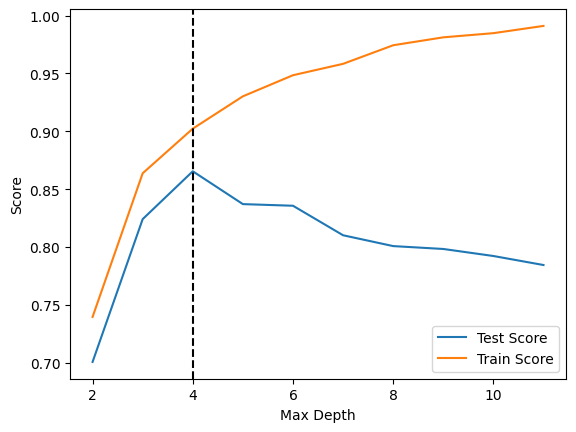

In [53]:
plt.plot(range(2, 12), test_scores, label='Test Score')
plt.plot(range(2, 12), train_scores, label='Train Score')

# Find the depth value that gives the maximum test score
maxx = test_scores.index(max(test_scores)) + 2
plt.axvline(maxx, color='black', linestyle='--')


plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()